In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from collections import deque
from queue import PriorityQueue

In [2]:
def create_graph_from_csv(file_name):
    return nx.from_pandas_edgelist(pd.read_csv(file_name), 'Source', 'Destination', ['Weight'], create_using=nx.DiGraph)

In [3]:
def visualize_graph(graph, visited_nodes_sequence):
    for step, visited_nodes in enumerate(visited_nodes_sequence):
        subgraph = graph.subgraph(visited_nodes)
        pos = nx.spring_layout(graph)
        nx.draw(subgraph, pos, with_labels=True, node_size=700, node_color='skyblue', font_size=8, font_color='black')
        labels = nx.get_edge_attributes(graph, 'Weight')
        nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

        # Display the number of nodes traced
        print(f"Step {step + 1}: Traced {len(visited_nodes)} nodes")

        plt.title(f"Step {step + 1}")
        plt.show()

In [4]:
def bfs(graph, start, goal):
    visited = set()
    queue = deque([(start, [start], 0)])  # Initialize cost to 0

    visited_nodes_sequence = []

    while queue:
        current_vertex, path, cost = queue.popleft()

        visited_nodes_sequence.append(set(path))

        if current_vertex == goal:
            # Display the number of nodes traced by BFS
            print("Path from (BFS) {} to {}: {}".format(start, goal, ' -> '.join(path)))
            print(f"Nodes traced by BFS: {len(visited_nodes_sequence[-1])}")
            print("Total cost: {}".format(cost))
            visualize_graph(graph, visited_nodes_sequence)
            return

        if current_vertex not in visited:
            visited.add(current_vertex)
            neighbors = graph.neighbors(current_vertex)
            for neighbor in neighbors:
                if neighbor not in visited:
                    new_cost = cost + graph[current_vertex][neighbor]['Weight']
                    queue.append((neighbor, path + [neighbor], new_cost))

    print("No path found from {} to {}.".format(start, goal))

In [5]:
def dfs(graph, start, goal):
    visited = set()
    stack = [(start, [start], 0)]  # Initialize cost to 0

    visited_nodes_sequence = []

    while stack:
        current_vertex, path, cost = stack.pop()

        visited_nodes_sequence.append(set(path))

        if current_vertex == goal:
            # Display the number of nodes traced by DFS
            print("Path from (DFS) {} to {}: {}".format(start, goal, ' -> '.join(path)))
            print(f"Nodes traced by DFS: {len(visited_nodes_sequence[-1])}")
            print("Total cost: {}".format(cost))
            visualize_graph(graph, visited_nodes_sequence)
            return

        if current_vertex not in visited:
            visited.add(current_vertex)
            neighbors = graph.neighbors(current_vertex)
            for neighbor in neighbors:
                if neighbor not in visited:
                    new_cost = cost + graph[current_vertex][neighbor]['Weight']
                    stack.append((neighbor, path + [neighbor], new_cost))

    print("No path found from {} to {}.".format(start, goal))

In [6]:
def best_first_search(graph, start, goal):
  visited = set()
  priority_queue = PriorityQueue()
  priority_queue.put((0, start, [start]))

  visited_nodes_sequence = []

  while not priority_queue.empty():
      cost, current_vertex, path = priority_queue.get()

      visited_nodes_sequence.append(set(path))

      if current_vertex == goal:
          # Display the number of nodes traced by Best-First Search
          print("Path from (BestFS) {} to {}: {}".format(start, goal, ' -> '.join(path)))
          print(f"Nodes traced by Best-First Search: {len(visited_nodes_sequence[-1])}")
          print("Total cost: {}".format(cost))
          visualize_graph(graph, visited_nodes_sequence)
          return

      if current_vertex not in visited:
          visited.add(current_vertex)
          neighbors = graph.neighbors(current_vertex)
          for neighbor in neighbors:
              if neighbor not in visited:
                  new_cost = cost + graph[current_vertex][neighbor]['Weight']
                  priority_queue.put((new_cost, neighbor, path + [neighbor]))

  print("No path found from {} to {}.".format(start, goal))

In [7]:
def main():
    file_name = 'SimpleGraph1.csv'
    graph = create_graph_from_csv(file_name)

    start_vertex = input("Enter the starting vertex: ").upper()
    goal_vertex = input("Enter the goal vertex: ").upper()

    algorithm_choice = input("Choose algorithm (1 for BFS, 2 for DFS, 3 for BestFS): ")

    if algorithm_choice == '1':
        bfs(graph, start_vertex, goal_vertex)
    elif algorithm_choice == '2':
        dfs(graph, start_vertex, goal_vertex)
    elif algorithm_choice == '3':
        best_first_search(graph, start_vertex, goal_vertex)
    else:
        print("Invalid algorithm choice. Please choose 1 for BFS, 2 for DFS, or 3 for BestFS.")

Enter the starting vertex: A
Enter the goal vertex: F
Choose algorithm (1 for BFS, 2 for DFS, 3 for BestFS): 3
Path from (BestFS) A to F: A -> B -> F
Nodes traced by Best-First Search: 3
Total cost: 6
Step 1: Traced 1 nodes


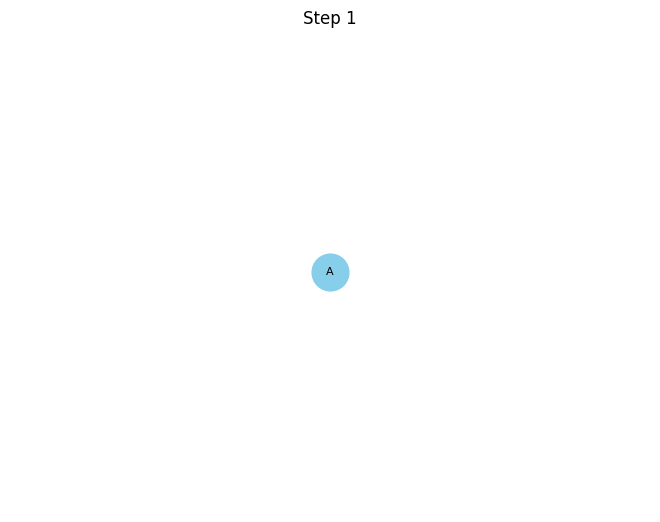

Step 2: Traced 2 nodes


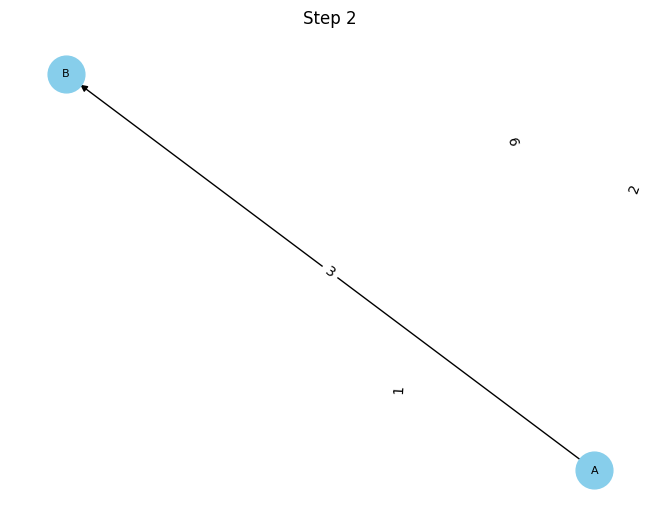

Step 3: Traced 2 nodes


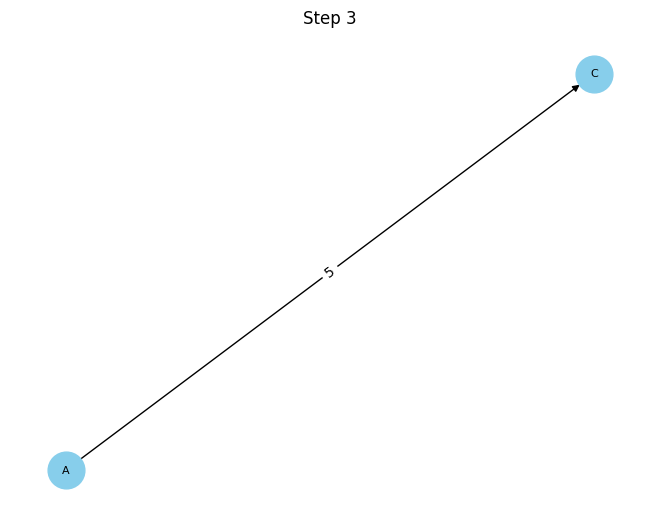

Step 4: Traced 3 nodes


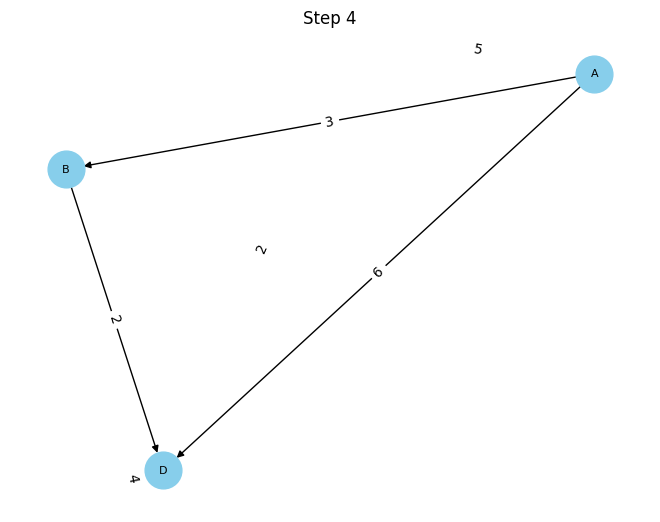

Step 5: Traced 2 nodes


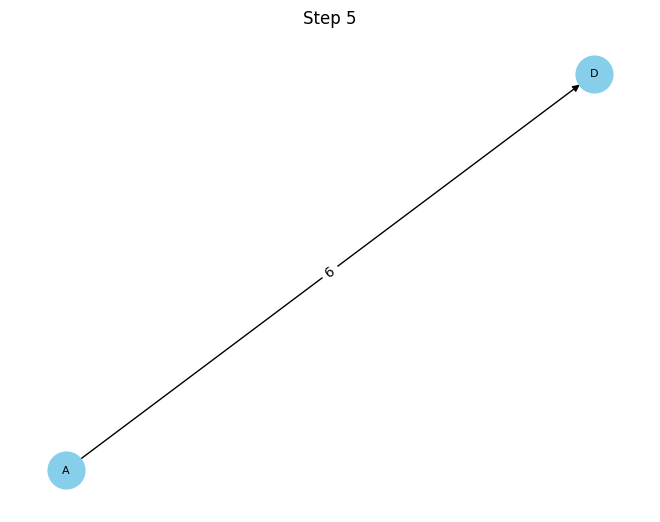

Step 6: Traced 4 nodes


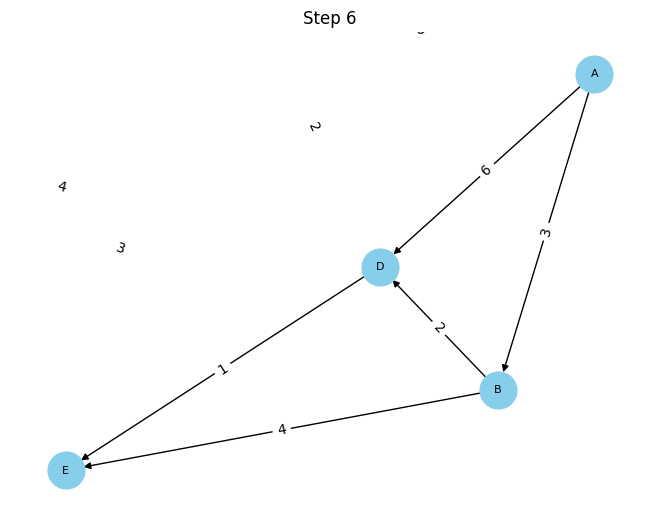

Step 7: Traced 3 nodes


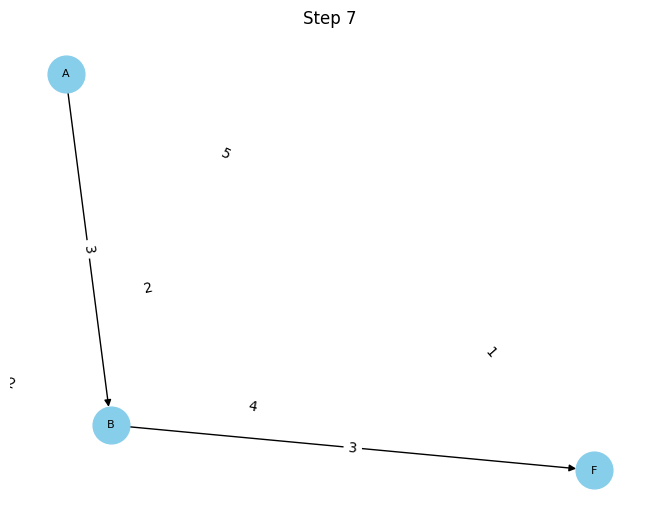

In [9]:
if __name__ == "__main__":
    main()